<h1>Анализ продаж компьютерных игр

**Описание проекта**
<br>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План исследования:**
<br>Шаг 1. Откроем файл с данными и изучим общую информацию о нем.
<br>Шаг 2. Подготовим данные для дальнейшего исследования.
- Заменим названия столбцов;
- Преобразуем данные в нужные типы.
- Обработаем пропуски при необходимости:
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Шаг 3. Проведем исследовательский анализ данных.
- Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Посмотрим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составим портрет пользователя каждого региона и определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Напишем общий вывод

<br>**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Шаг 1. Откроем файл с данными и изучим общую информацию**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.duplicated().sum()

0

Ознакомившись с данными видим следующее:
- нарушение стиля в названиях столбцов
- довольно большое кол-во пропусков
- столбец "Year_of_Release" - имеет некорректный формат float64
- столбец "User_Score" - имеет некорректный тип object
- явных дубликатов нет, на следующем шаге углубимся подробнее и проверим данные на наличие неявных дубликатов

**Шаг 2. Подготовим данные**

Приведем названия столбцов к нижнему регистру:

In [6]:
games.columns = games.columns.str.lower()

Преобразуем данные в нужные типы и обработаем пропуски:

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<br>Рассмотрим пропуски в "name" и "genre" более подробно.

In [8]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имеем всего 2 строки. Удалим их

In [9]:
games = games.dropna(subset = ['name'])

<br>Теперь обработаем столбцы "year_of_release" и "user_score".
<br>Значение tbd в столбце "user_score" - это аббревиатура от английского To Be Determined, то есть "Будет определено". Это означает, что рейтинг не определен. Столбец "user_score" приведем к типу 'float', т.к. как мы видим, что оценивание идет по шкале от 0 до 10 + 2 знака после запятой. Для этого сначала заменим значения tbd на NaN
<br>Значения в столбце "year_of_release" приведем к цельночисленному типу ввиду того, что в нем указаны лишь года - дата выхода игры

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].astype('Int64')

Рассмотрим столбец "rating", выведем его уникальные значения (т.е. возможные оценки):

In [11]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<br>Ознакомившись с системой оценок организации ESRB:
<br>«RP» («Rating Pending») — «Рейтинг ожидается» Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 
Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
<br>Т.е. в данном случае скорее-всего пропущенные значения обозначают то, что игра просто не была отправлена на присвоение рейтинга.
Либо просто данные были потеряны ввиду тех.ошибки или иных факторов.
<br>Заменим пропущенные значения на "Not Defined", т.е. дословно "не определено"

In [12]:
games['rating'] = games['rating'].fillna('Not Defined')

Посчитаем суммарные продажи во всех регионах. Занесем их в отдельный столбец:

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [14]:
games.head(105)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.00,0.69,84.0,7.6,M,7.38
101,Battlefield 3,X360,2011,Shooter,4.46,2.11,0.06,0.69,84.0,7.4,M,7.32
102,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85.0,8.6,E,7.20
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,49.0,8.0,E10+,7.20


Теперь поищем неявные дубликаты по трем столбцам "name", "platform", "year_of_release" и удалим их.:

In [15]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Посмотрим на пропуски в столбце "year_of_release"
Выясним какой процент они составляют и если прроцент будет небольшой - удалим их

In [16]:
len(games[games['year_of_release'].isna()]) / len(games)

0.016096218286261368

In [17]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'].isna().sum()

0

<br>Мы предобработали данные для дальнейшей с ними работы и устранили увиденные ошибки.
<br>Мы заменили пропущенные значения в нескольких столбцах, но остальные пропуски оставили, т.к. чтобы как-то их заполнить - у нас недостаточно вводных данных. 
<br>Возможно, игры еще новые, и их пока не оценили критики и пользователи, а возможно причина появления пропущенных значений заключается в тех.ошибке, ошибке заполнения или иных обстоятельств. Но и отбросить эти данные мы не можем, т.к. они будут нам нужны для дальнейшего исследования.

**Шаг 3. Проведем исследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные года и важны ли данные за все периоды?

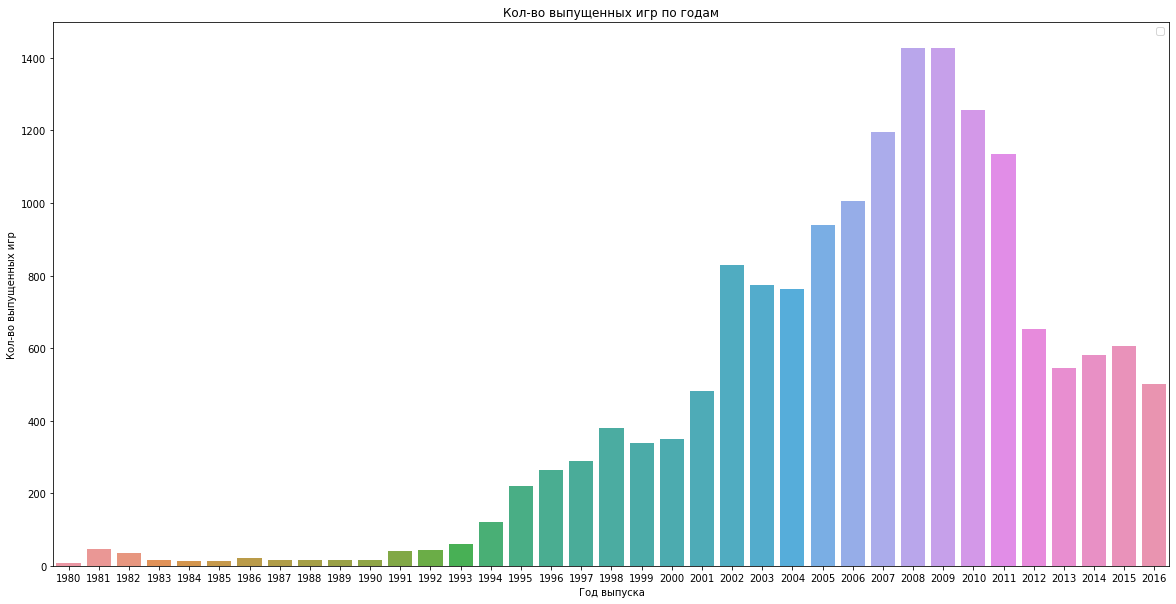

In [19]:
games_each_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(20, 10))
sns.barplot(x=games_each_year.index, y=games_each_year['name'])
plt.title("Кол-во выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во выпущенных игр")
plt.legend('')
plt.show()

<br>Из графика видим, что до 1991 игр выпускалось очень мало, но уже после количество игр начинает ежегодно расти быстрыми темпами. В 2002 был резкий скачок, а пик пришелся на 2008-2009 года. Затем крафик начал опускаться вниз. Скорее-всего данный спад связан с развитием мобильных устройств и, соответственно, мобильных игр, а так же прочих мобильных приложений и соц.сетей.
<br>В итоге: наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы;

Посмотрим, как менялись продажи по платформам.

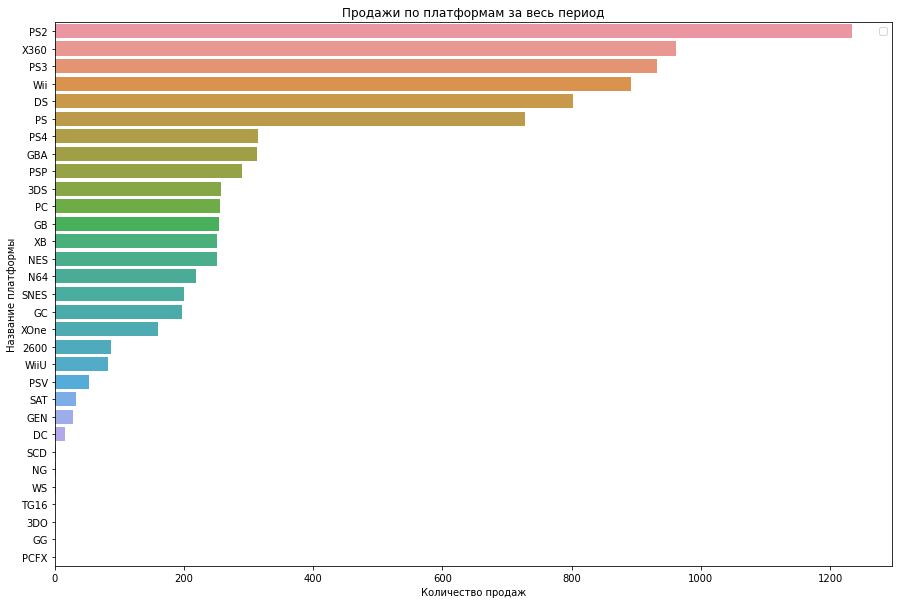

In [20]:
sales_on_platform = games.pivot_table(index='platform', 
                                      values='total_sales', 
                                      aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=sales_on_platform['total_sales'], y=sales_on_platform.index)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Количество продаж")
plt.ylabel("Название платформы")
plt.legend('')
plt.show()

Из графика видно, что самые популярные игровые платформы за весь период - это PS2, X360, PS3, Wii, DS, PS.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [21]:
top_6_platform = games.copy() 
top_6_platform = top_6_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:6]

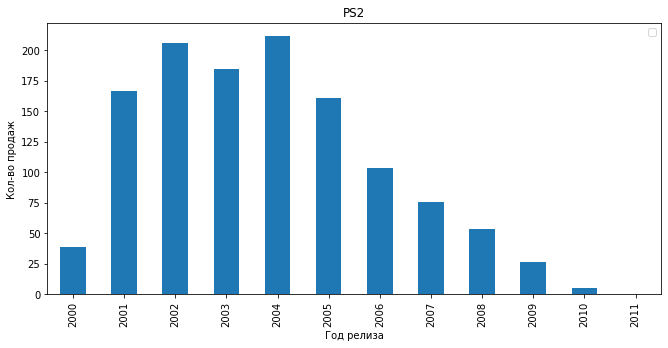

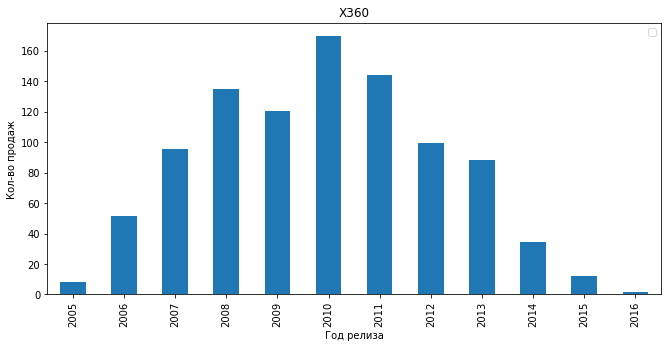

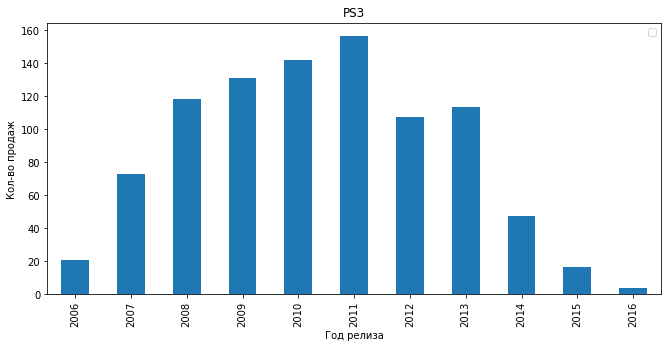

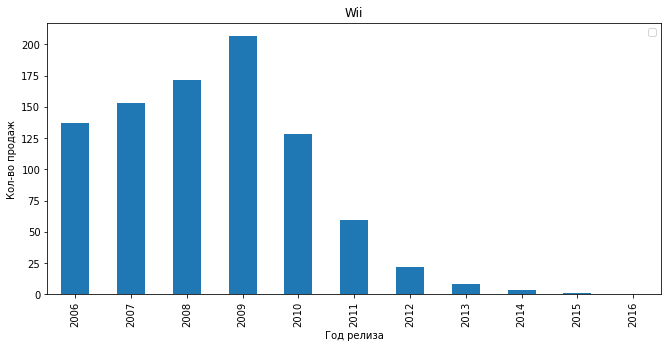

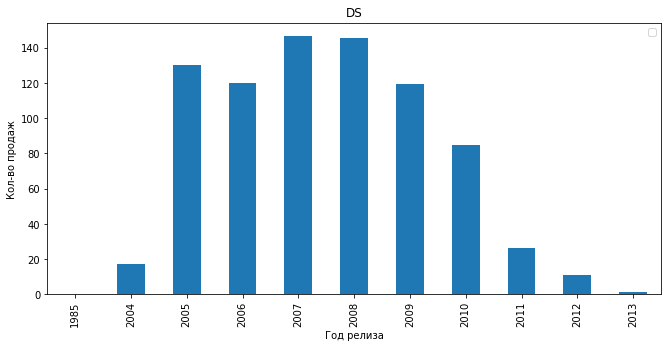

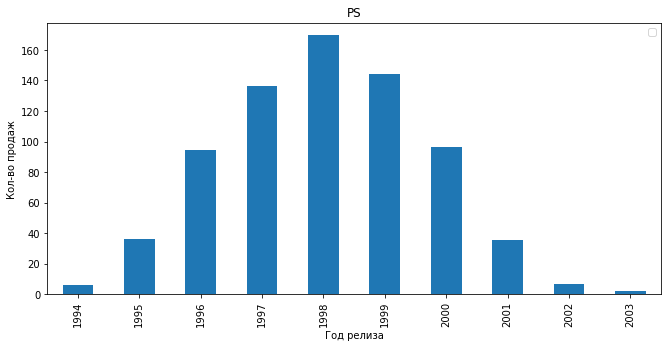

In [23]:
for platform in top_6_platform:
    games[games['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum').plot(
        kind='bar', figsize=(11,5))
    plt.title(platform)
    plt.xlabel("Год релиза")
    plt.ylabel("Кол-во продаж")
    plt.legend('')
    plt.show()

Исходя из диаграмм распределения, видим, что средний период существования платформ длится около 7 лет.
Многие из представленных платформ уже потеряли свою попоулярность и "выведены" с рынка

In [25]:
platform_lifespan = games.groupby('platform')['year_of_release'].max() - games.groupby('platform')['year_of_release'].min()
platform_lifespan.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

Возьмем данные за соответствующий актуальный период, чтобы построить прогноз на 2017 год.
За актуальный период возьмем данные с 2012 по 2016 года, т.к. исходя из предыдущих графиков видно, что продажи платформ активно растут как раз в течение первых 5-и лет, а затем уходят на спад

In [26]:
actual_platforms = games.query('year_of_release >= 2012')

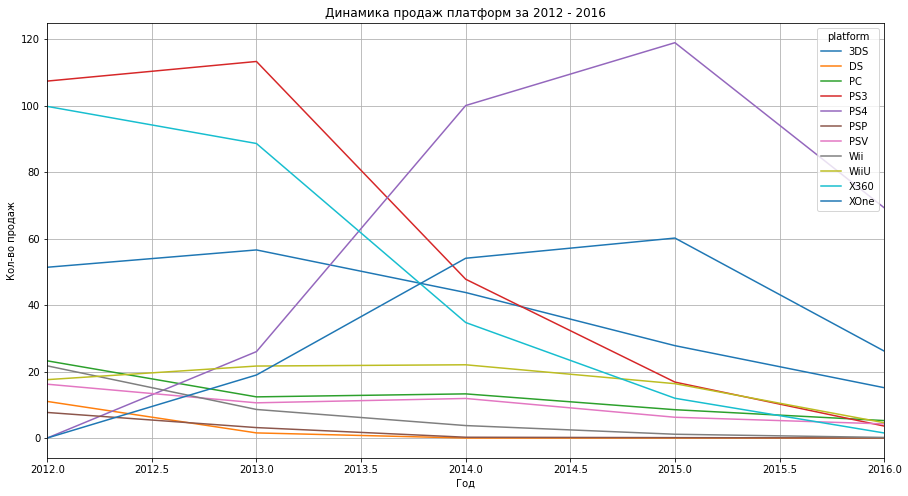

In [27]:
actual_platforms.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0).plot(grid=True, figsize=(15, 8), 
                     title = 'Динамика продаж платформ за 2012 - 2016'
                    ).set(xlabel = 'Год', ylabel = 'Кол-во продаж');
plt.xlim(2012, 2016)
plt.show()

<br>Итак, видим, что самыми потенциально прибыльными платформами для нас являются PS4 и XOne. Какое-то время будут продаваться платформы 3DS, Wii U и PS3. Остальные успели упасть в продажах и в 2017 году резкого всплеска продаж ждать не стоит. 
<br>Так же заметим, что на графике виден спад продаж всех платформ c 2015-го года.
<br>Подитожив: перспективными платформами являются PS4, XOne, 3DS, WiiU и PS3 за актуальный для нас временной отрезок в 5 лет (2012-2016 год)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

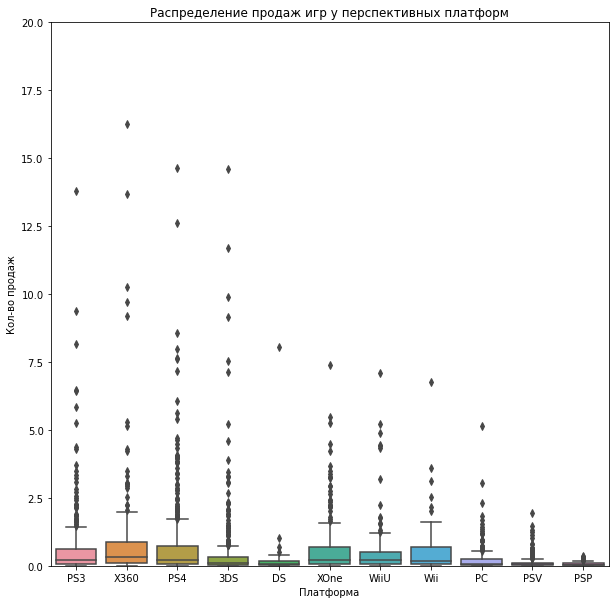

In [28]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='platform', y='total_sales', data=actual_platforms)
ax.set_ylim(0, 20)
ax.set_ylabel('Кол-во продаж')
ax.set_xlabel('Платформа')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

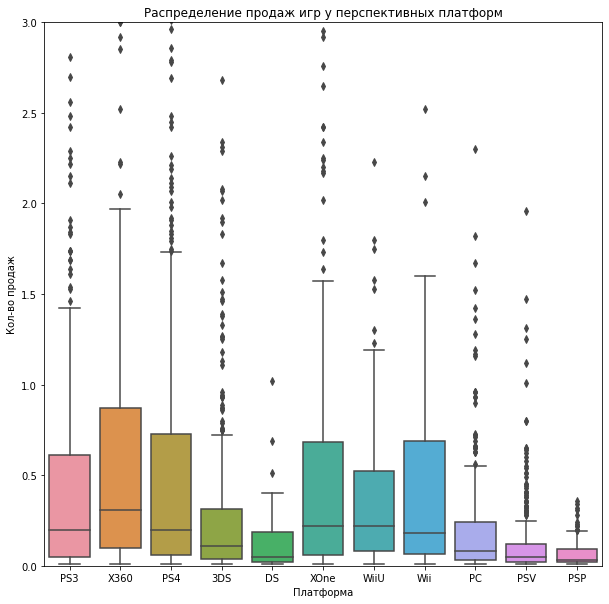

In [29]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='platform', y='total_sales', data=actual_platforms)
ax.set_ylim(0, 3)
ax.set_ylabel('Кол-во продаж')
ax.set_xlabel('Платформа')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

Выведем информацию по продажам платформ за актуальный период:

In [33]:
actual_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


На графиках мы видим, что общая картина следующая: средние продажи игр на платформах много больше, чем медианные значения. Раз медианные значения продаж смещены к нижнему краю – это значит, что на всех платформах выходит много игр с относительно небольшими продажами. При этом везде значительную долю продаж приносят игры-хиты.
Хорошие показатели у таких платформ как "PS4", "XOne", "X360", "WiiU", "PS3" и "Wii"

<br>Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
<br>Самая популярная и перспективная платформа за выбранный актуальный период на данный момент - PS4. Поэтому рассчеты будем делать для нее.
<br>Посчитаем корреляцию между оценками пользователей и продажами:

In [34]:
Sell_PS4 = actual_platforms[actual_platforms['platform']=='PS4']
Sell_PS4['user_score'].corr(Sell_PS4['total_sales'])

-0.031957110204556376

Построим диаграмму рассеяния:

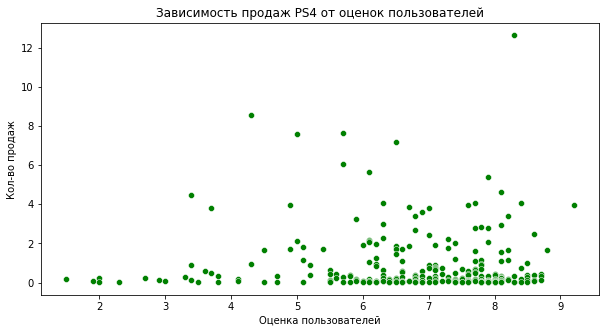

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=Sell_PS4, color='green')
plt.title('Зависимость продаж PS4 от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во продаж')
plt.show()

Посчитаем корреляцию между оценками критиков и продажами и так же построим диаграмму рассеяния:

In [37]:
Sell_PS4['critic_score'].corr(Sell_PS4['total_sales'])

0.40656790206178095

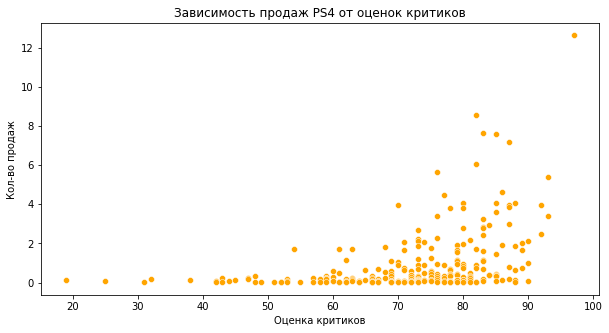

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=Sell_PS4, color='orange',)
plt.title('Зависимость продаж PS4 от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во продаж')
plt.show()

<br>Прямой зависимости нет, но есть ощущение, что оценки критиков пускай и слабо, но влияют на продажи.
<br>Проверим это с продажами игр на всех выделенных раннее перспективных платформах

Платформа PS4
Corr для пользователей: -0.031957110204556376
Corr для критиков: 0.40656790206178095


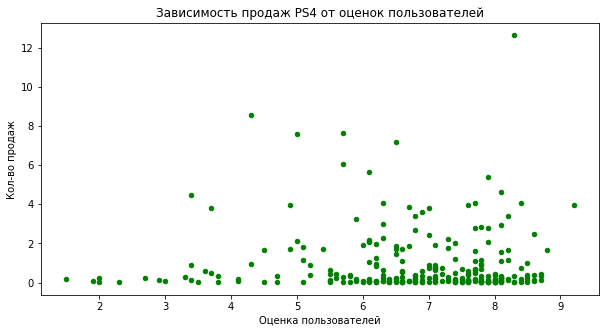

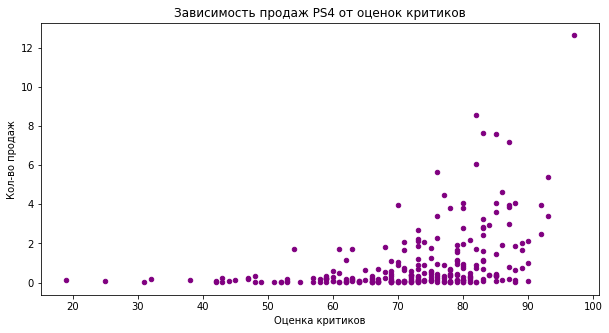


Платформа PS3
Corr для пользователей: -0.006205767686051523
Corr для критиков: 0.3341517575509856


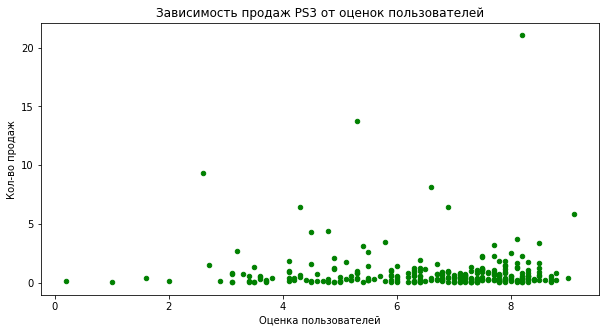

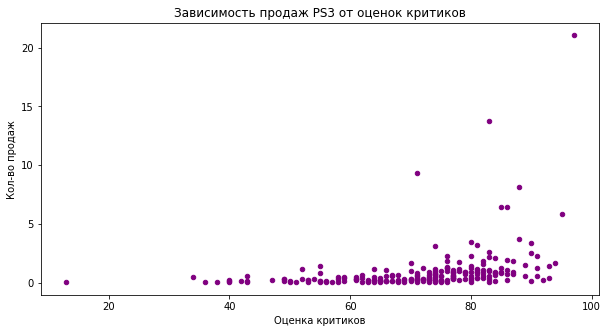


Платформа X360
Corr для пользователей: 0.006163978646213326
Corr для критиков: 0.3605734888507336


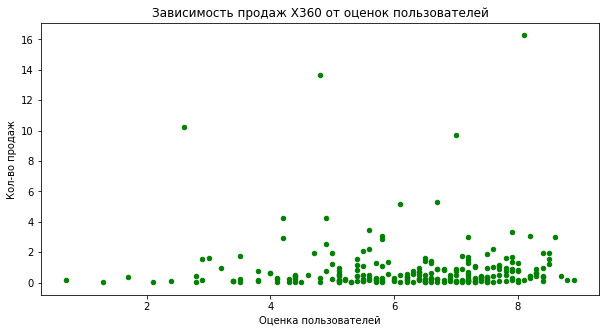

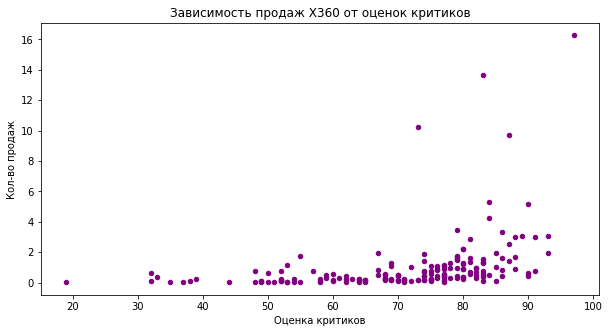


Платформа 3DS
Corr для пользователей: 0.19758263411038599
Corr для критиков: 0.3208028695360785


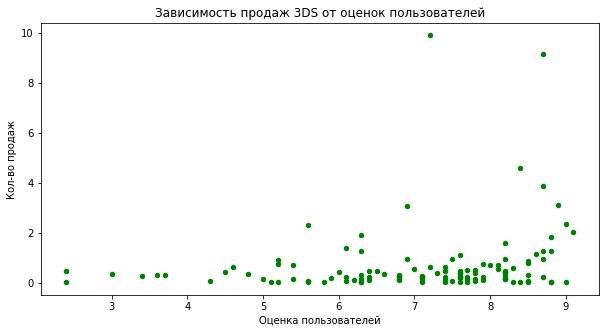

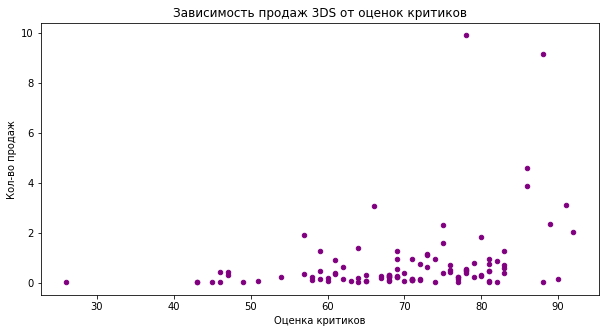


Платформа XOne
Corr для пользователей: -0.06892505328279414
Corr для критиков: 0.4169983280084017


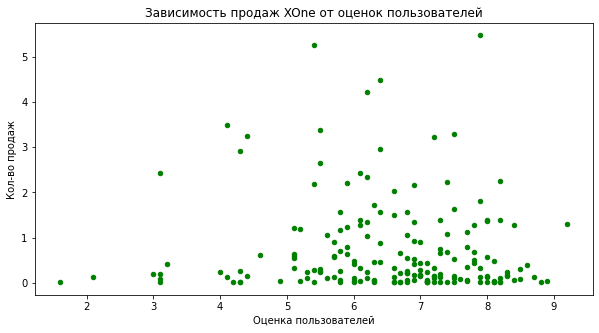

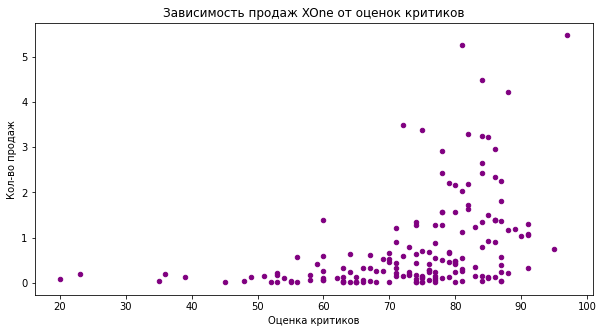


Платформа WiiU
Corr для пользователей: 0.4002190202148617
Corr для критиков: 0.34837976012017485


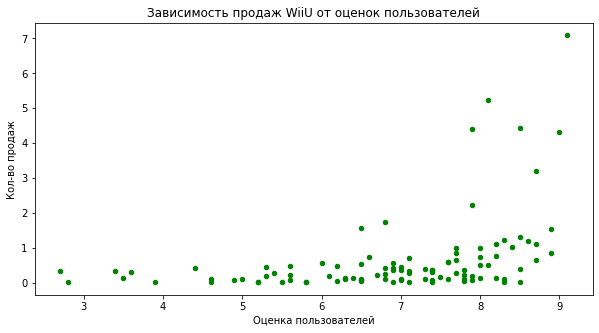

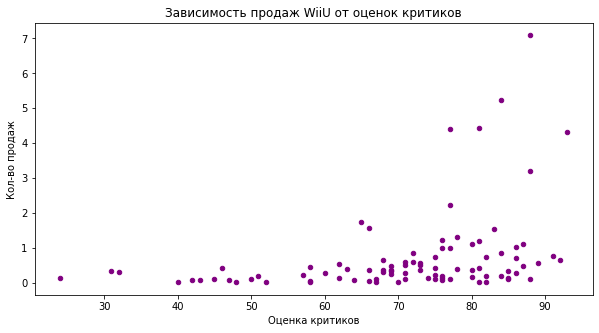


Платформа PC
Corr для пользователей: -0.12186747630735577
Corr для критиков: 0.23724324311567915


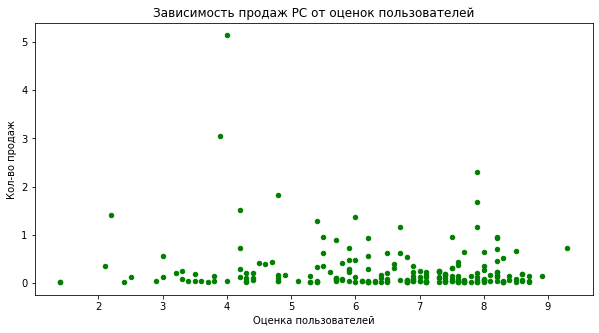

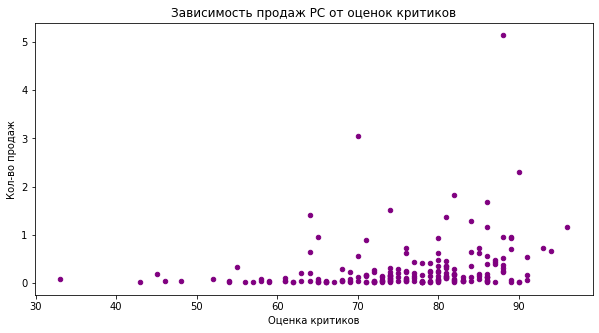


Платформа PSV
Corr для пользователей: -0.004339437514314869
Corr для критиков: 0.0944878992931617


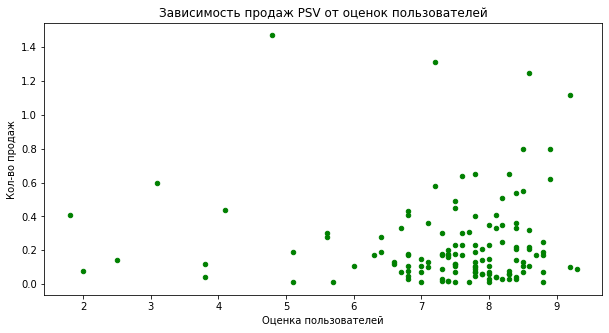

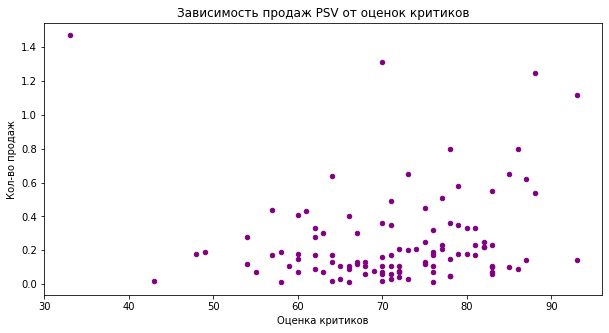


Платформа Wii
Corr для пользователей: 0.29619680007479526
Corr для критиков: -0.4243413011077494


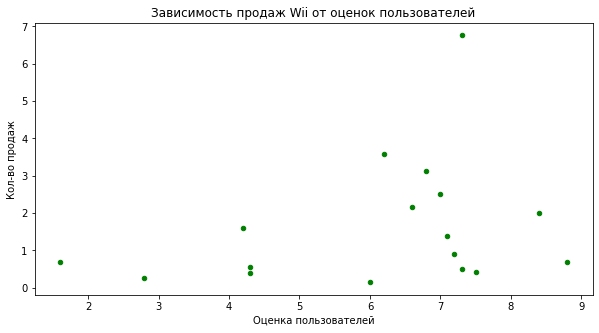

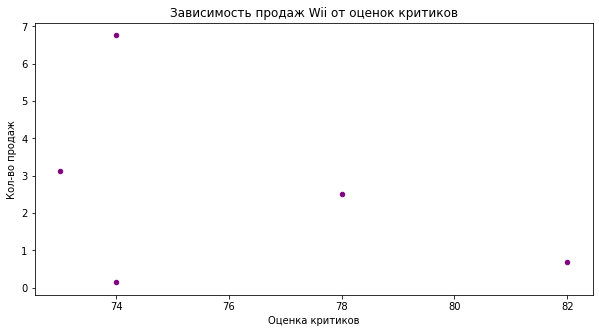

In [39]:
top_9_platforms = actual_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:9]
for plat in top_9_platforms.unique():
    print(f'Платформа {plat}')
    corr_user = actual_platforms.query("platform == @plat")["user_score"].corr(
        actual_platforms.query("platform == @plat")["total_sales"])
    corr_critic = actual_platforms.query("platform == @plat")["critic_score"].corr(
        actual_platforms.query("platform == @plat")["total_sales"])
    
    print(f'Corr для пользователей: {corr_user}')
    print(f'Corr для критиков: {corr_critic}')
    
    actual_platforms.query('platform == @plat').plot(kind='scatter', 
                                                  x='user_score',
                                                  y='total_sales',
                                                  color='green',
                                                  figsize=(10,5))
    plt.title(f'Зависимость продаж {plat} от оценок пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Кол-во продаж')
    plt.show()
    
    actual_platforms.query('platform == @plat').plot(kind='scatter',
                                                  x='critic_score',
                                                  y='total_sales',
                                                  color='purple',
                                                  figsize=(10,5))
    plt.title(f'Зависимость продаж {plat} от оценок критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Кол-во продаж')
    plt.show()
        
    print()

По графикам и коэффициентам корреляций можно сделать вывод, что оценка пользователей почти не влияет на продажи платформ, а вот с оценками критиков всё таки пусть и не сильная, но всё же, наблюдается связь с кол-вом продаж. Это говорит о том, что критики слабо, но влияют на продажи, нежели оценки других пользователей.
Платформы "DS" и "PSP" в данное исследование не брали, т.к. в рассматриваемом периоде данные платформы окончательно потеряли свою актуальность, что и видно по малому числу продаж в исследованиях выше.
Единственное исключение - у платформы "WiiU" все же пользователи больше влияют на продажи, нежели критики. Это видно по корреляции.

Посмотрии на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?

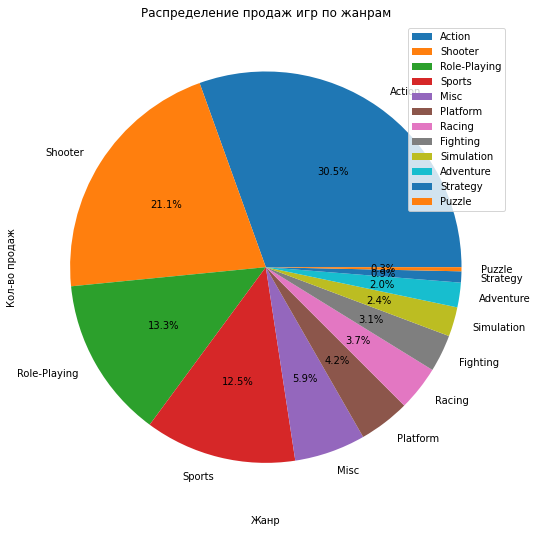

In [40]:
actual_platforms.pivot_table(
    index = 'genre', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values(
    ascending=False, by = 'total_sales'
).plot(kind='pie', 
       autopct='%1.1f%%',
       figsize=(9,9), 
       y= 'total_sales')
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во продаж')
plt.show()

Да, действительно, некоторые жанры выделяются, так самые прибыльные жанры - это "Action", "Shooter", "Role-Playing" и "Sports", а наименее прибыльные - "Strategy" и "Puzzle"

Чтобы проверить это, рассмотрим ситуацию более подробно, добавив сравнение медианных продаж, проиллюстрировав их диаграммами размаха.

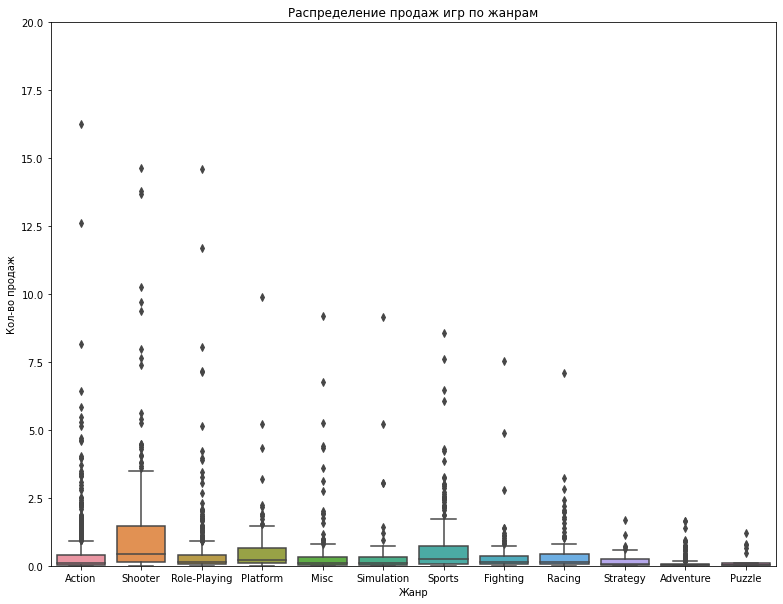

In [41]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='genre', y='total_sales', data=actual_platforms)
ax.set_ylim(0, 20)
ax.set_ylabel('Кол-во продаж')
ax.set_xlabel('Жанр')
ax.set_title('Распределение продаж игр по жанрам')
plt.show()

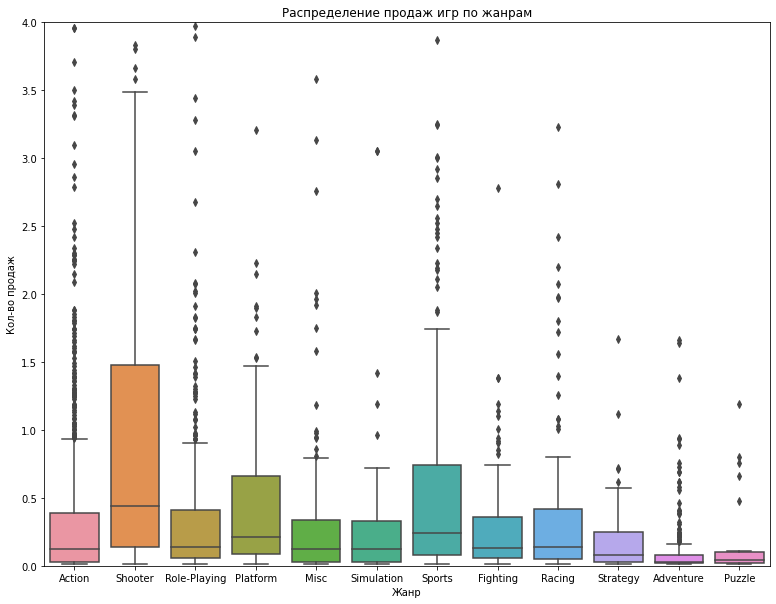

In [42]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='genre', y='total_sales', data=actual_platforms)
ax.set_ylim(0, 4)
ax.set_ylabel('Кол-во продаж')
ax.set_xlabel('Жанр')
ax.set_title('Распределение продаж игр по жанрам')
plt.show()

Исходя из графиков выше видим, что:
- Жанры "Shooter", "Sports" и "Platform" - имеют самые стабильные продажи
- Жанры "Action" и "Role-Playing" - имеют успех за счет игр-хитов и не являются стабильными в плане продаж
- Жанры "Adventure" и "Puzzle" самые наимение прибыльные жанры среди представленных

Т.е. не смотря на большие продажи жанра "Action" - игры этого жанра очень не стабильны и чаще всего не приносят хороших продаж. То же самое с жанром "Role-Playing" - они оба зависимы от игр-хитов. А самый стабильный и хорошо продающийся жанр - "Shooter". С меньшим успехом идет жанр Sports, а за ним - "Platform".

**Вывод**
<br>До 1991 игр выпускалось очень мало, но уже после количество игр начинает ежегодно расти быстрыми темпаминаи. Большее количество игр выпускалось в промежутке с 2002-го по 2011-й годы, затем пошел спад, в связи с развитием мобильных устройств
<br>Самые популярные игровые платформы за весь период - это PS2, X360, PS3, Wii, DS, PS.
<br>Средний период существования платформ длится около 7 лет. Пик продаж наступает в течении 5 лет после выхода платформы.
<br>Больше всего за актуальный для нас период было продано игр на PS4 и XOne.
<br>Между продажами и оценками критиков, действительно, хоть и слабая, но прослеживается связь. Пользовательские же оценки почти не играют значимой роли. Выходит, что для людей мнение критиков важнее мнения других пользователей.
<br>Самые прибыльные жанры - это  "Shooter", "Sports" и "Platform". Жанры "Action" и "Role-Playing" - хороши, но имеют успех за счет игр-хитов и не являются стабильными в плане продаж. Наименее прибыльные жанры - "Adventure" и "Puzzle"

**Шаг 4. Составим портрет пользователя каждого региона**

Определим топ-5 самых популярных платформ для пользователя каждого региона:

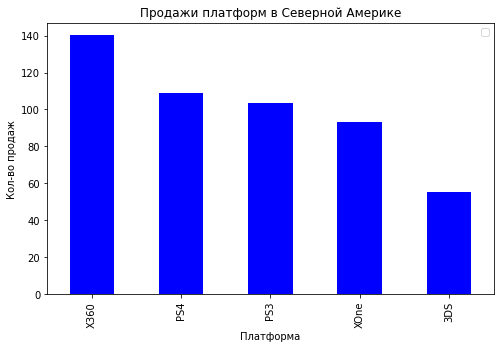

In [43]:
actual_platforms.pivot_table(index = 'platform', 
                        values = 'na_sales', 
                        aggfunc = 'sum').sort_values(
    ascending=False, by = 'na_sales').head(5).plot(
    kind = 'bar', color='blue', figsize=(8,5))
plt.title('Продажи платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.legend('')
plt.show()

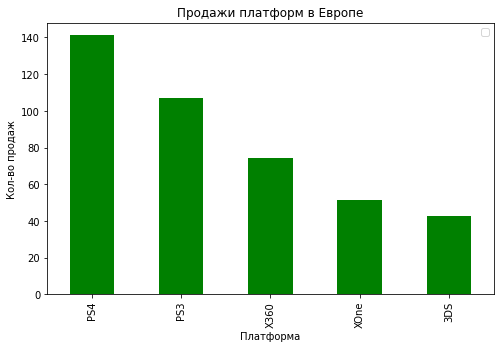

In [44]:
actual_platforms.pivot_table(index = 'platform', 
                        values = 'eu_sales', 
                        aggfunc = 'sum').sort_values(
    ascending=False, by = 'eu_sales').head(5).plot(
    kind = 'bar', color='green', figsize=(8,5))
plt.title('Продажи платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.legend('')
plt.show()
plt.show()

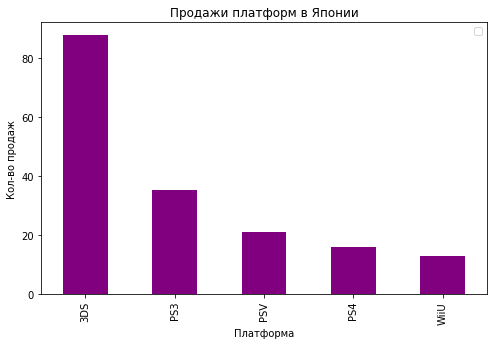

In [45]:
actual_platforms.pivot_table(index = 'platform', 
                        values = 'jp_sales', 
                        aggfunc = 'sum').sort_values(
    ascending=False, by = 'jp_sales').head(5).plot(
    kind = 'bar', color='purple', figsize=(8,5))
plt.title('Продажи платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.legend('')
plt.show()
plt.show()

Вкусы у пользователей из Северной Америки и Европы примерно одинаковы - Американские X360 и XOne и Японские PS4, PS3 и 3DS. Причем первые три места в обоих континентах достаются таким платформам как X360, PS4 и PS3.
<br>А вот подавляющее большинство японских пользователей предпочитают свои отвечественные платформы - PS3, PSV, PS4, 3DS и Wii, причем 3DS лидирует с большим отрывом в этом списке. 

Определим топ-5 самых популярных жанров для пользователя каждого региона:

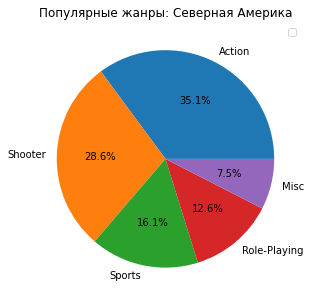

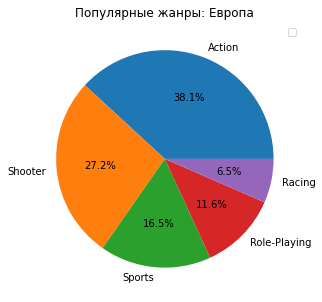

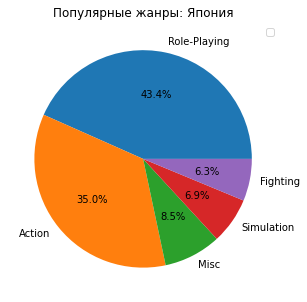

In [46]:
regions = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}
for name in regions:
    actual_platforms.pivot_table(index = 'genre', 
                                 values = name, 
                                 aggfunc = 'sum').sort_values(
        ascending=False, by=name).head(5).plot(
        kind = 'pie',
        autopct='%1.1f%%',
        figsize=(5,5),
        y=name)
    plt.title(f'Популярные жанры: {regions[name]}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend('')
    plt.show()

Опять же видим, что вкусы у пользователей из Северной Америки и Европы снова схожи - они в основном отдают предпочтение таким жанрам как "Action", "Shooter" и "Sports", в то время как в Японии больше играют в "Role-Playing" и "Action" - своя культура, свои любимые жанры.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

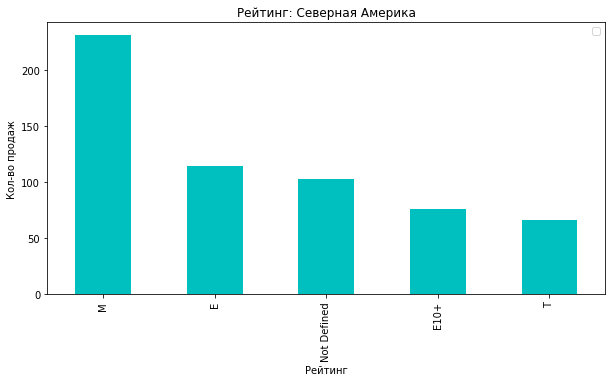

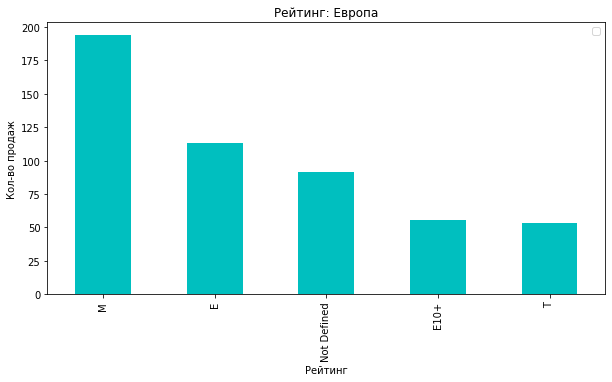

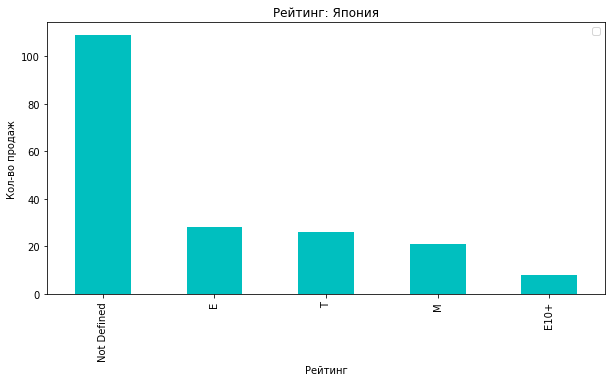

In [47]:
for name in regions:
    actual_platforms.pivot_table(index = 'rating', 
                                 values = name, 
                                 aggfunc = 'sum').sort_values(
        ascending=False, by=name).head(5).plot(
        kind = 'bar', color='c', figsize=(10,5))
    plt.title(f'Рейтинг: {regions[name]}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Кол-во продаж')
    plt.legend('')
    plt.show()

Первое, что бросается в глаза: около половины игр японского рынка - без рейтинга, т.к. рейтинг ESRB для Японии не заполняется, скорее-всего у них свой рейтинг, по которому у нас просто нет данных.
<br>В Северной Америке и Европе все очень схоже - в этих континентах преобладают игры с рейтингом "М", "Е", "Е10+", "Т" и с неопределенным рейтингом, для котрого причины идентчны описанным выше.

**Вывод по составлению портрета пользователя каждого региона**
<br>Пользователи Северная Америки и Европы очень схожи во вкусах: 
- в обоих континентах предпочитают такие платформы как Американские X360 и XOne и Японские PS4, PS3 и 3DS
- они в основном отдают предпочтение таким жанрам как "Action", "Shooter" и "Sports"
- в этих континентах преобладают игры с рейтингом "М", "Е", "Е10+", "Т"

По Японии ситуация складывается иначе:
- большинство японских пользователей предпочитают свои отвечественные платформы - PS3, PSV, PS4, 3DS и Wii
- в Японии больше играют в "Role-Playing" и "Action"
- около половины игр японского рынка - без рейтинга, остальная часть - "М", "Е", "Е10+", "Т"

**Шаг 5. Проверим гипотезы**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

<br> Значение alpha зададим равным 0.05. Равность дисперсий установим False, т.к. не знаем, что наши выборки равны 
<br> Для проверки гипотез применим st.ttest_ind, т.к. сравниваем средние двух генеральных совокупностей между собой
<br>alternative указывать не будем (по-умолчанию 'two-sided'), т.к. проверяем двустороннюю гипотезу: равны или не равны средние. 

In [48]:
test_XOne = actual_platforms.query('(user_score >= 0) & (platform == "XOne")')['user_score'].dropna()
test_PC = actual_platforms.query('(user_score >= 0) & (platform == "PC")')['user_score'].dropna()

print('Средний пользовательский рейтинг платформы Xbox One:', test_XOne.mean())
print('Средний пользовательский рейтинг платформы PC', test_PC.mean())

alpha = 0.05
results = st.ttest_ind(test_XOne,
                       test_PC,
                       equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Видим, что гипотеза подтвердилась, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем гипотезы:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports разные

<br>Значение alpha зададим равным 0.05. Равность дисперсий - False, т.к. не знаем, что наши выборки равны 
<br>Для проверки гипотез применим st.ttest_ind, т.к. сравниваем средние двух генеральных совокупностей между собой
<br>alternative указывать не будем (по-умолчанию 'two-sided'), т.к. проверяем двустороннюю гипотезу: равны или не равны средние. 

In [49]:
test_Action = actual_platforms.query('genre == "Action" and user_score.notna()')['user_score'].dropna()
test_Sports = actual_platforms.query('genre == "Sports" and user_score.notna()')['user_score'].dropna()

print('Средний пользовательский рейтинг жанра Action:', test_Action.mean())
print('Средний пользовательский рейтинг жанра Sports', test_Sports.mean())

alpha = 0.05
results = st.ttest_ind(test_Action,
                       test_Sports,
                       equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports 5.455670103092784
p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Средние пользовательские рейтинги жанров Action и Sports все-таки разные.

**Шаг 6. Общий вывод**

<br>Мы проанализировали исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и проверили некоторые гипотезы.
<br>Данные были предобработаны: были устранены нарушения стиля, исправлено несоответствие типов данных. Данные были проверены на наличие дубликатов явных и неявных, а так же пропущенных значений, которые были утсранены там, где это было возможно, многие пропуски мы оставили незаполненными, чтобы не исказить всю статистику. Так же посчитали общее кол-во продаж по всем регионам внеся их в новый столбец.
<br>Провели исследовательский анализ и выяснили следующее:
- до 1991 игр выпускалось очень мало, но уже после количество игр начинает ежегодно расти быстрыми темпами. Наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы;
- самые популярные игровые платформы за весь период - это PS2, X360, PS3, Wii, DS, PS.
- средний период существования платформ длится около 7 лет. 
- продажи платформ активно растут в течение первых 5-и лет, а затем уходят на спад
- перспективными платформами являются PS4, XOne, 3DS, WiiU и PS3 за актуальный для нас временной отрезок (2012-2016 год)
- виден спад продаж всех платформ c 2015-го года
- медианные значения продаж смещены к нижнему краю – на всех платформах выходит много игр с относительно небольшими продажами. При этом везде значительную долю продаж приносят игры-хиты.
- оценка пользователей почти не влияет на продажи платформ, а вот оценки критиков слабо, но влияют
- самые прибыльные жанры - это "Shooter", "Sports" и "Platform". Жанры "Action" и "Role-Playing" - хороши, но имеют успех за счет игр-хитов и не являются стабильными в плане продаж. Наименее прибыльные жанры - "Adventure" и "Puzzle"

Был составлен портрет пользователя по регионам
- Пользователи Северная Америки и Европы:  
  - предпочитают такие платформы как Американские X360 и XOne и Японские PS4, PS3 и 3DS
  - они в основном отдают предпочтение таким жанрам как "Action", "Shooter" и "Sports"
  - в этих континентах преобладают игры с рейтингом "М", "Е", "Е10+", "Т"
- Пользователи в Японии:
  - предпочитают свои отвечественные платформы - PS3, PSV, PS4, 3DS и Wii
  - в Японии больше играют в "Role-Playing" и "Action"
  - около половины игр японского рынка - без рейтинга (рейтинг ESRB для Японии не заполняется), оставшаяся часть - "М", "Е", "Е10+", "Т"

Проверили все стоящие перед нами гипотезы. Оказалось, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные